In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CAIS++ Mini Project 1

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1aoCshV-2PftuFYPQbjKUxee7qH8ekro_/CAIS++ Mini Project 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Thyroid_Diff_Cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Thyroid_Diff_Cleaned.csv'

In [ ]:
df

,Unnamed: 0,Age,Gender_M,Smoking_Yes,Hx Smoking_Yes,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,...,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Focality_Uni-Focal,Risk_Intermediate,Risk_Low,T
0,0,27,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,True,False,True,T1a
1,1,34,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,True,False,True,T1a
2,2,30,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,True,False,True,T1a
3,3,62,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,True,False,True,T1a
4,4,62,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,True,T1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,72,True,True,True,True,False,True,False,False,...,False,False,True,False,False,True,True,False,False,T4b
379,379,81,True,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,T4b
380,380,72,True,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,T4b
381,381,61,True,True,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,T4b


In [ ]:
le = LabelEncoder()
df["T_encoded"] = le.fit_transform(df["T"])


if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

X = df.drop(['T','T_encoded'], axis = 1)
y = df['T_encoded']

X=X.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

NameError: name 'LabelEncoder' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=10000, multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_lr))
print("Classification Report")
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy 0.5454545454545454
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.00      0.00      0.00         9
           2       0.59      0.80      0.68        30
           3       0.45      0.47      0.46        19
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2

    accuracy                           0.55        77
   macro avg       0.28      0.31      0.29        77
weighted avg       0.46      0.55      0.49        77



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Accuracy: 0.5584415584415584
              precision    recall  f1-score   support

         T1a       0.90      0.90      0.90        10
         T1b       0.00      0.00      0.00         9
          T2       0.59      0.73      0.66        30
         T3a       0.55      0.58      0.56        19
         T3b       0.00      0.00      0.00         3
         T4a       0.25      0.25      0.25         4
         T4b       0.00      0.00      0.00         2

    accuracy                           0.56        77
   macro avg       0.33      0.35      0.34        77
weighted avg       0.50      0.56      0.52        77



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train,y_train)

print('Grid Search Best Params' , grid_search.best_params_)
print('Grid Search Best Score' , grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Grid Search Best Params {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search Best Score 0.6565309360126917
Accuracy: 0.6233766233766234


In [ ]:
print('Grid Search Best Params' , grid_search.best_params_)
print('Grid Search Best Score' , grid_search.best_score_)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report")
print(classification_report(y_test, y_pred_best))

Grid Search Best Params {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search Best Score 0.6565309360126917
Accuracy: 0.6233766233766234
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.00      0.00      0.00         9
           2       0.62      0.83      0.71        30
           3       0.55      0.63      0.59        19
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       0.00      0.00      0.00         2

    accuracy                           0.62        77
   macro avg       0.37      0.41      0.39        77
weighted avg       0.52      0.62      0.57        77



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-1081796710.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


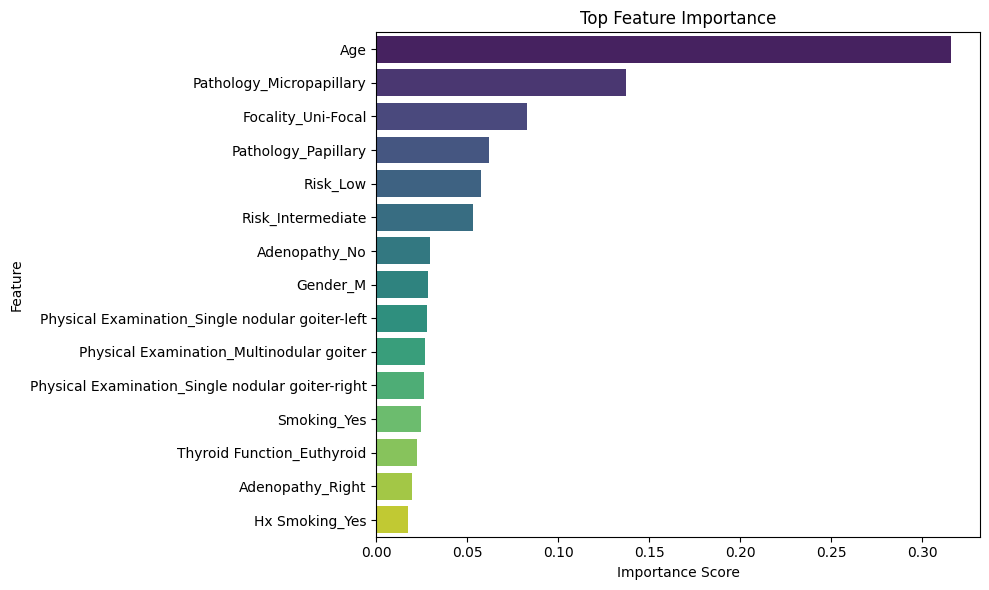

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10,6))

sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.title("Top Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



<Figure size 600x500 with 0 Axes>

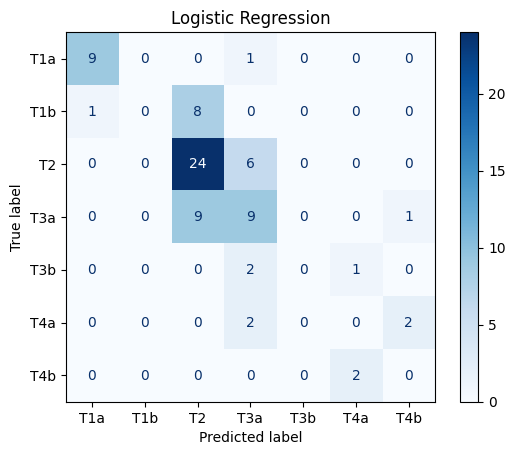

<Figure size 600x500 with 0 Axes>

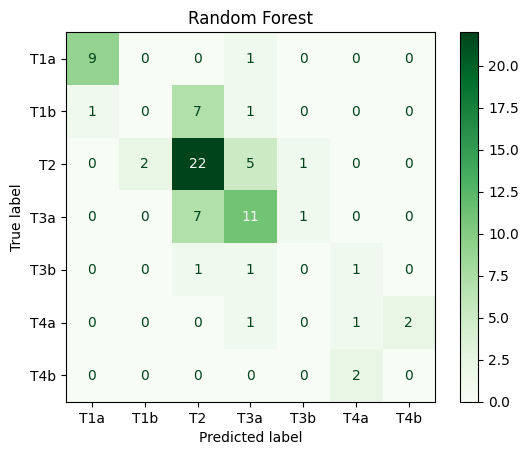

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=le.classes_, cmap="Blues")
plt.title("Logistic Regression")
plt.show()

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display_labels=le.classes_, cmap="Greens")
plt.title("Random Forest")
plt.show()